# SEQ Task Even vs. Odd Heatmap

In [1]:
from collections import OrderedDict
from glob import glob
from scipy import stats
from math import sqrt
import string
import nibabel as nb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mp
import pylab as pl
%matplotlib inline
sns.set_palette('muted')

def heatmap_triangle(dataframe, axes): #creates rotated correlation heatmap (45 degrees clockwise)
    N = dataframe.shape[1]
    D = dataframe #Pandas dataframe format    
    C = np.tril(D) #get the lower triangle of the matrix   
    C = np.ma.masked_array(C,C == 0) #mask the upper triangle
    #transformation matrix for rotating heatmap.
    A = np.array([(y, x) for x in range(N,-1,-1) for y in range(N+1)]) #contents
    t = np.array([[0.5,1], #tranformation matrix
                  [0.5,-1]])
    A = np.dot(A, t)     
    cmap = pl.cm.RdBu_r #-1.0 correlation is blue, 0.0 is white, 1.0 is red
    norm = mp.colors.BoundaryNorm(np.linspace(-1,1,20), cmap.N)  
    axes.set_xticks([])  #MUST be before call to pl.pcolormesh() to align properly
    axes.set_yticks([])    
    X = A[:,1].reshape(N+1, N+1) #plot the correlation heatmap triangle
    Y = A[:,0].reshape(N+1, N+1)
    caxes = pl.pcolormesh(X, Y, np.flipud(C), axes=axes, cmap=cmap, norm=norm)    
    axes.set_xlim(right=0) #remove the ticks and reset the x limit
    #add colorbar below heatmap
    cb = pl.colorbar(caxes, ax=axes, orientation='horizontal', shrink=0.5825, fraction=0.05, 
                     pad=-0.035, ticks=np.linspace(-1, 1, 5), use_gridspec=True)
    #cb.set_label("$\mathrm{Pearson's}\ r$")
    return caxes, D.index


##############
### SCRIPT ###
##############
    
sids = ['783125', '783126', '783127', '783128', '783129', '783130', '783131', '783132', '783133', '783134',
        '783135', '783136', '783137', '783138', '783139', '783140', '783141', '783142', '783143', '783144',
        '783146', '783147', '783148', '783149', '783150', '783151', '783152', '783153', '783154', '783155', 
        '783156', '783157', '783158', '783159', '783163'] #35 subjects

proj_dir = '/home/data/madlab/data/mri/seqtrd' 
mask_filenames = []
cope_files = []
for SID in sids:
    subjmasks = glob(proj_dir + '/mask/cortical_rois/{0}/anat_masks/_subject_id_{0}/*'.format(SID))
    mask_filenames.append(sorted(subjmasks)) #append sorted subject masks for all regions
    subjcopes = glob(proj_dir + '/frstlvl/odd_vs_even/inseq1_image*/'
                     + SID + '/modelfit/contrasts/cope0*_inseq1_*.nii.gz')
    cope_files.append(sorted(subjcopes)) #append sorted cope files for all image events 
    #if cope files are empty or do not contain the correct number of files, print subject id
    if len(cope_files[-1]) == 0 or len(cope_files[-1]) != 24:
        print(SID)

/home/data/madlab/envs/seqtrd_madlab_env/lib/python2.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)
/home/data/madlab/envs/seqtrd_madlab_env/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Cell to double-check the array indexing

In [2]:
test_sub = 0
#change first index of cope_files to indicate participant index in sids array
for i, curr_mask in enumerate(mask_filenames[test_sub]):
    print(i, mask_filenames[test_sub][i].split('/')[-1][:-7])

(0, 'cerebellum_bimask_warped')
(1, 'l_ant_hpc_warped')
(2, 'l_cerebellum_bimask_warped')
(3, 'lh-caudate_warped')
(4, 'lh-superiortemporalctx_warped')
(5, 'lh_hpc_warped')
(6, 'lh_mpfc_warped')
(7, 'limbicthal_bin_trans_warped')
(8, 'r_ant_hpc_warped')
(9, 'r_cerebellum_bimask_warped')
(10, 'rh-caudate_warped')
(11, 'rh-superiortemporalctx_warped')
(12, 'rh_hpc_warped')
(13, 'rh_mpfc_warped')
(14, 'seq_bold_r01_dtype_despike_roi')
(15, 'x_combined_antHC_mPFC_mask')


In [3]:
for i, curr_cope in enumerate(cope_files[test_sub]):
    print(i, cope_files[test_sub][i].split('/')[-1][7:-7]) 

(0, 'inseq1_even_A')
(1, 'inseq1_odd_A')
(2, 'inseq1_not_A')
(3, 'inseq1_all_other')
(4, 'inseq1_even_B')
(5, 'inseq1_odd_B')
(6, 'inseq1_not_B')
(7, 'inseq1_all_other')
(8, 'inseq1_even_C')
(9, 'inseq1_odd_C')
(10, 'inseq1_not_C')
(11, 'inseq1_all_other')
(12, 'inseq1_even_D')
(13, 'inseq1_odd_D')
(14, 'inseq1_not_D')
(15, 'inseq1_all_other')
(16, 'inseq1_even_E')
(17, 'inseq1_odd_E')
(18, 'inseq1_not_E')
(19, 'inseq1_all_other')
(20, 'inseq1_even_F')
(21, 'inseq1_odd_F')
(22, 'inseq1_not_F')
(23, 'inseq1_all_other')


### Use binarized mask to obtain activation in left & right hemisphere for each region of interest

In [4]:
inseq = {'subjid':[],
         'hp_evenA':[], 'hp_oddA':[], 'hp_evenB':[], 'hp_oddB':[], 'hp_evenC':[], 'hp_oddC':[], 
         'hp_evenD':[], 'hp_oddD':[], 'hp_evenE':[], 'hp_oddE':[], 'hp_evenF':[], 'hp_oddF':[],
         'mpfc_evenA':[], 'mpfc_oddA':[], 'mpfc_evenB':[], 'mpfc_oddB':[], 'mpfc_evenC':[], 'mpfc_oddC':[], 
         'mpfc_evenD':[], 'mpfc_oddD':[], 'mpfc_evenE':[], 'mpfc_oddE':[], 'mpfc_evenF':[], 'mpfc_oddF':[]}
                     
for i in range(len(sids)):
    inseq['subjid'].append(sids[i])
    lh_hp_img = nb.load(mask_filenames[i][1]) #regional masks
    rh_hp_img = nb.load(mask_filenames[i][8])
    lh_mpfc_img = nb.load(mask_filenames[i][6])
    rh_mpfc_img = nb.load(mask_filenames[i][13])
    
    inseq_evenA_img = nb.load(cope_files[i][0]) #lvl2 cope files
    inseq_oddA_img = nb.load(cope_files[i][1])
    inseq_evenB_img = nb.load(cope_files[i][4])
    inseq_oddB_img = nb.load(cope_files[i][5])
    inseq_evenC_img = nb.load(cope_files[i][8])
    inseq_oddC_img = nb.load(cope_files[i][9])
    inseq_evenD_img = nb.load(cope_files[i][12])
    inseq_oddD_img = nb.load(cope_files[i][13])
    inseq_evenE_img = nb.load(cope_files[i][16])
    inseq_oddE_img = nb.load(cope_files[i][17])
    inseq_evenF_img = nb.load(cope_files[i][20])
    inseq_oddF_img = nb.load(cope_files[i][21])

    trials = ['evenA', 'oddA', 'evenB', 'oddB', 'evenC', 'oddC', #image presentations
              'evenD', 'oddD', 'evenE', 'oddE', 'evenF', 'oddF'] 
    
    for r in ['hp', 'mpfc']: #iterate through regions
        for t in trials: #iterate through image event
            #Isolate voxels in cope for mask regions with a value > 1
            lh_data = eval('inseq_{0}_img.get_data()[lh_{1}_img.get_data() > 0.]'.format(t,r))
            rh_data = eval('inseq_{0}_img.get_data()[rh_{1}_img.get_data() > 0.]'.format(t,r))
            bihemi_data = np.concatenate((lh_data, rh_data)) #combine hemispheres
            inseq['{0}_{1}'.format(r,t)].append(bihemi_data) #append to appropriate dict key
                    
inseq = pd.DataFrame(inseq) #convert to Pandas DF

## Separate into odd and even trials for each region

In [5]:
#dictionaries for regional odd and even presentations
hp_odd = {}
hp_even = {}
mpfc_odd = {}
mpfc_even = {}

for key in inseq: #go through each key
    if "hp_odd" in key: 
        hp_odd['{0}'.format(key[-1])] = inseq['{0}'.format(key)] #uses letter as key for new dict
    elif "hp_even" in key:
        hp_even['{0}'.format(key[-1])] = inseq['{0}'.format(key)]        
    elif "mpfc_odd" in key:
        mpfc_odd['{0}'.format(key[-1])] = inseq['{0}'.format(key)]
    elif "mpfc_even" in key:
        mpfc_even['{0}'.format(key[-1])] = inseq['{0}'.format(key)]
    
hp_odd = pd.DataFrame(hp_odd) #convert dicts to Pandas DFs
hp_even = pd.DataFrame(hp_even)
mpfc_odd = pd.DataFrame(mpfc_odd)
mpfc_even = pd.DataFrame(mpfc_even)

# HIPPOCAMPUS

In [6]:
hp_plots = []

for x, SID in enumerate(sids): #for each subject
    sub_plots = [] #subject correlations in plot-specific matrix dimensions (6x6)
    for i, key in enumerate(hp_odd): #iterate through odd images {A-F}
        img_corrs = [] 
        for j, key2 in enumerate(hp_even): #iterate through even images
            #append correlation for each even with the current odd image
            img_corrs.append(stats.pearsonr(hp_odd["{0}".format(key)][x], 
                                            hp_even["{0}".format(key2)][x])[0])
        sub_plots.append(img_corrs) #creates 6x6 matrix for subject
    hp_plots.append(sub_plots) #appends individual matrix to a larger sample matrix
hp_plot = np.mean(hp_plots, axis=0) #averages across subject matrices on both axes

In [7]:
#print hp_plot

In [8]:
dict1 = {'down1':[], 'down2':[], 'down3':[], 'down4':[], 'down5':[], #initial dict creation
         'center':[], 'up1':[], 'up2':[], 'up3':[], 'up4':[], 'up5':[]}
keys = ['down1', 'down2', 'down3', 'down4', 'down5', #list to establish desireded order of keys
        'center', 'up1', 'up2', 'up3', 'up4', 'up5']
list_of_tuples = [(key, dict1[key]) for key in keys] #list comp to reorder dict1
hp_barplot =  OrderedDict(list_of_tuples) #ordered dictionary

for i, key in enumerate(hp_barplot): #each diagonal     
    if key == 'center': #diagonal
        for j, curr_odd in enumerate(hp_plot): #each row
            hp_barplot['center'].append(curr_odd[j]) #gets middle diagonal
    #upper-right half of heatmap
    if key == 'up1': #1 row above (odd-even)
        for j, curr_odd in enumerate(hp_plot[:-1]):
            hp_barplot['up1'].append(curr_odd[j+1])
    if key == 'up2': #2 rows above diagonal
        for j, curr_odd in enumerate(hp_plot[:-2]):
            hp_barplot['up2'].append(curr_odd[j+2])
    if key == 'up3': #3 rows above diagonal
        for j, curr_odd in enumerate(hp_plot[:-3]):
            hp_barplot['up3'].append(curr_odd[j+3])
    if key == 'up4': #4 rows above diagonal
        for j, curr_odd in enumerate(hp_plot[:-4]):
            hp_barplot['up4'].append(curr_odd[j+4])
    if key == 'up5': #5 rows above diagonal
        for j, curr_odd in enumerate(hp_plot[:-5]):
            hp_barplot['up5'].append(curr_odd[j+5])
    #Lower-left half of heatmap
    if key == 'down1': #1 row below diagonal (even-odd)
        for j, curr_odd in enumerate(hp_plot[1:]):
            hp_barplot['down1'].append(curr_odd[j])        
    if key == 'down2':
        for j, curr_odd in enumerate(hp_plot[2:]):
            hp_barplot['down2'].append(curr_odd[j])
    if key == 'down3':
        for j, curr_odd in enumerate(hp_plot[3:]):
            hp_barplot['down3'].append(curr_odd[j])     
    if key == 'down4':
        for j, curr_odd in enumerate(hp_plot[4:]):
            hp_barplot['down4'].append(curr_odd[j])  
    if key == 'down5':
        for j, curr_odd in enumerate(hp_plot[5:]):
            hp_barplot['down5'].append(curr_odd[j])         

In [9]:
#print hp_barplot

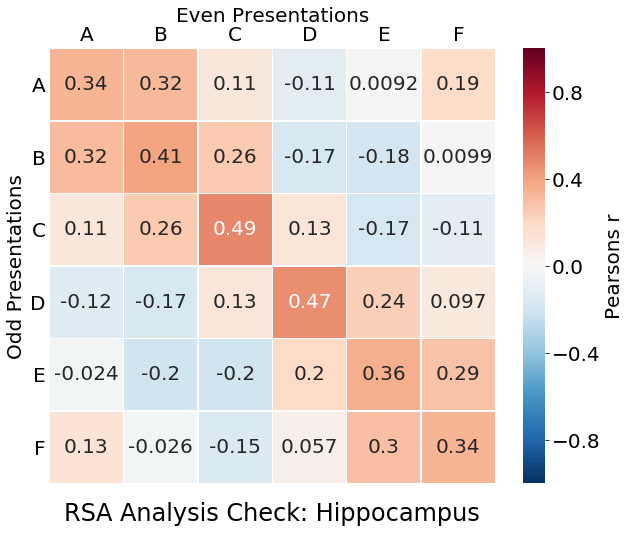

In [10]:
plt.rcParams.update({'font.size': 20}) #change font size on figures
vmin = np.min(hp_plot) #set min and max values for anchoring on zero
vmax = np.max(hp_plot)

rows = ['A', 'B', 'C', 'D', 'E', 'F'] #x-axis values
cols = ['A', 'B', 'C', 'D', 'E', 'F'] #y-axis values
cmap = plt.get_cmap("RdBu_r")
hp_df = pd.DataFrame(hp_plot, index = rows, columns = cols)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(hp_df, annot = True, cmap = cmap, linewidth = 0.5, cbar_kws = {'label': 'Pearsons r'}, 
                 vmin = -1, vmax = 1, center = 0)
ax.tick_params(axis = u'both', which = u'both',length = 0) #hides ticks, but not tick labels
ax.xaxis.tick_top() #x-axis ticks/tick labels on top
ax.xaxis.set_label_position('top') #put x-axis label on top
ax.set_xlabel('Even Presentations')
plt.yticks(rotation = 0) #rotate y-axis tick labels
ax.set_ylabel('Odd Presentations')
plt.title("RSA Analysis Check: Hippocampus", y = -0.1) #blace figure title at bottom
#plt.savefig("/home/arenf001/seq_HP_rsacheck.png", dpi = 1080)
plt.show()

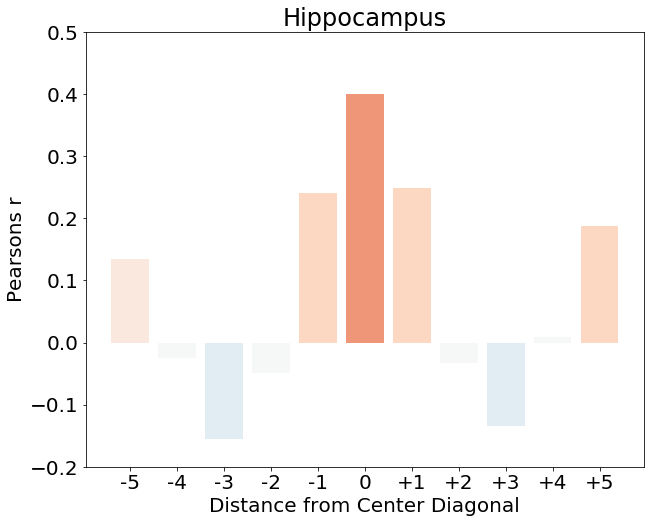

In [11]:
hp_df = pd.DataFrame({"x" : ['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5'],
                   "y" : [np.mean(hp_barplot['down5']), np.mean(hp_barplot['down4']), 
                          np.mean(hp_barplot['down3']), np.mean(hp_barplot['down2']), 
                          np.mean(hp_barplot['down1']), np.mean(hp_barplot['center']), 
                          np.mean(hp_barplot['up1']), np.mean(hp_barplot['up2']), 
                          np.mean(hp_barplot['up3']), np.mean(hp_barplot['up4']), 
                          np.mean(hp_barplot['up5'])]})
norm = mp.colors.BoundaryNorm(np.linspace(-1, 1, 20), cmap.N)
cmap = plt.get_cmap("RdBu_r")
fig, ax = plt.subplots(figsize = (10,8))
plt.bar(x="x", height="y", data=hp_df, color=cmap(norm(hp_df.y.values)))
plt.ylim(-0.2, 0.5)
plt.ylabel("Pearsons r")
plt.xlabel("Distance from Center Diagonal")
plt.title("Hippocampus")
#plt.savefig("/home/arenf001/seq_HP_barplot.png", dpi = 1080)
plt.show()

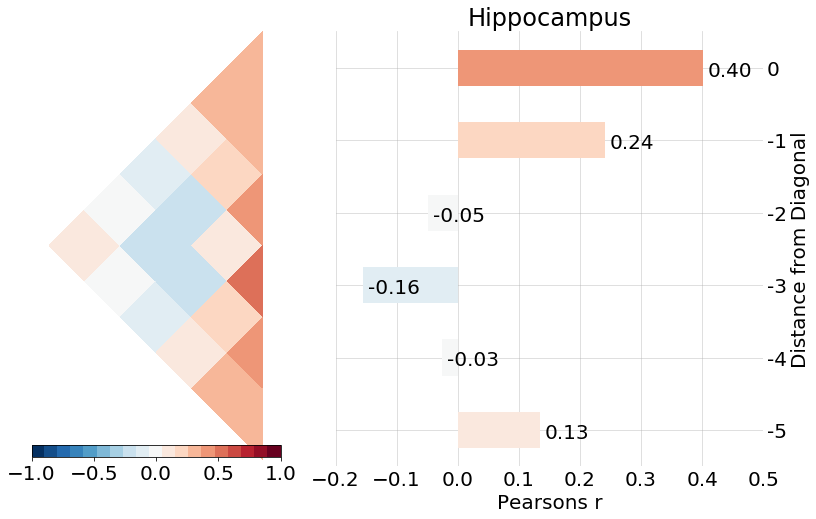

In [12]:
hp_list = [np.mean(hp_barplot['down5']), np.mean(hp_barplot['down4']), 
           np.mean(hp_barplot['down3']), np.mean(hp_barplot['down2']), 
           np.mean(hp_barplot['down1']), np.mean(hp_barplot['center'])]
labels = list(['-5','-4','-3','-2','-1', '0'])
series = pd.Series(hp_list, index=labels)
matrix = pd.DataFrame(hp_plot, columns=['A','B','C','D','E','F'], index=['A','B','C','D','E','F'])
fontsize = 8 
fig = plt.figure(figsize=(12,8)) #create figure
ax = fig.add_subplot(121, frame_on=False, aspect=2.0) #heatmap    
cax,order = heatmap_triangle(matrix,ax) #get heatmap axes and order of samples   
fig.subplots_adjust(wspace=-.08, hspace=0, left=-.05, right=.9) #spacing between heatmap and barplot   
ax = fig.add_subplot(122, frame_on=False) #barplot    
ax.set_axisbelow(True) #gridlines beneath the bars
cmap = pl.cm.RdBu_r #-1.0 correlation is blue, 0.0 is white, 1.0 is red
norm = mp.colors.BoundaryNorm(np.linspace(-1, 1, 20), cmap.N)
ax = series.plot(ax=ax, kind='barh', linewidth=0, grid=False, color=cmap(norm(hp_df.y.values)))
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), 
                xytext=(5, 10), textcoords='offset points')
ax.grid(b=True, which='major', axis='both', alpha=0.5) #grid lines    
ax.yaxis.tick_right() #y-axis marks on right side
ax.yaxis.set_label_position('right')    
ax.tick_params(length=0, axis='x') #adjust tick length
ax.tick_params(length=0, axis='y')
ax.set_xlim(-0.2,0.5)
ax.set_xlabel('Pearsons r') #axis labels
ax.set_ylabel('Distance from Diagonal')
ax.set_title("Hippocampus")
#plt.savefig("/home/arenf001/hp_combined.png", dpi = 800)
plt.show()

# Medial PFC

In [13]:
mpfc_plots = []

for x, SID in enumerate(sids):
    sub_plots = []
    for i, key in enumerate(mpfc_odd):
        img_corrs = []
        for j, key2 in enumerate(mpfc_even):
            img_corrs.append(stats.pearsonr(mpfc_odd["{0}".format(key)][x], 
                                            mpfc_even["{0}".format(key2)][x])[0])
        sub_plots.append(img_corrs)
    mpfc_plots.append(sub_plots)
mpfc_plot = np.mean(mpfc_plots, axis=0)

In [14]:
dict2 = {'down1':[], 'down2':[], 'down3':[], 'down4':[], 'down5':[],
         'center':[], 'up1':[], 'up2':[], 'up3':[], 'up4':[], 'up5':[]}
keys = ['down1', 'down2', 'down3', 'down4', 'down5', 'center', 'up1', 'up2', 'up3', 'up4', 'up5']
list_of_tuples = [(key, dict2[key]) for key in keys]
mpfc_barplot =  OrderedDict(list_of_tuples) #order dictionary keys

for i, key in enumerate(mpfc_barplot): #each diagonal     
    if key == 'center':
        for j, curr_odd in enumerate(mpfc_plot): #each row
            mpfc_barplot['center'].append(curr_odd[j]) #gets middle diagonal
    #upper-right half of heatmap
    if key == 'up1':
        for j, curr_odd in enumerate(mpfc_plot[:-1]):
            mpfc_barplot['up1'].append(curr_odd[j+1])
    if key == 'up2':
        for j, curr_odd in enumerate(mpfc_plot[:-2]):
            mpfc_barplot['up2'].append(curr_odd[j+2])
    if key == 'up3':
        for j, curr_odd in enumerate(mpfc_plot[:-3]):
            mpfc_barplot['up3'].append(curr_odd[j+3])
    if key == 'up4':
        for j, curr_odd in enumerate(mpfc_plot[:-4]):
            mpfc_barplot['up4'].append(curr_odd[j+4])
    if key == 'up5':
        for j, curr_odd in enumerate(mpfc_plot[:-5]):
            mpfc_barplot['up5'].append(curr_odd[j+5])
    #Lower-left half of heatmap
    if key == 'down1':
        for j, curr_odd in enumerate(mpfc_plot[1:]):
            mpfc_barplot['down1'].append(curr_odd[j])        
    if key == 'down2':
        for j, curr_odd in enumerate(mpfc_plot[2:]):
            mpfc_barplot['down2'].append(curr_odd[j])
    if key == 'down3':
        for j, curr_odd in enumerate(mpfc_plot[3:]):
            mpfc_barplot['down3'].append(curr_odd[j])     
    if key == 'down4':
        for j, curr_odd in enumerate(mpfc_plot[4:]):
            mpfc_barplot['down4'].append(curr_odd[j])  
    if key == 'down5':
        for j, curr_odd in enumerate(mpfc_plot[5:]):
            mpfc_barplot['down5'].append(curr_odd[j])         

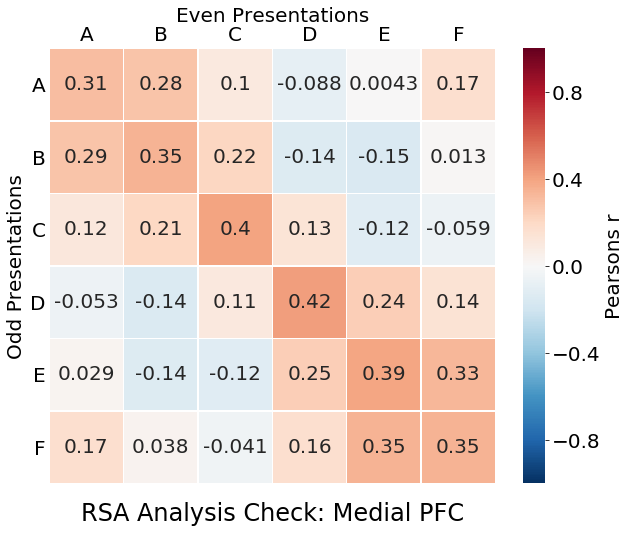

In [15]:
plt.rcParams.update({'font.size': 20}) #change font size on figures

rows = ['A', 'B', 'C', 'D', 'E', 'F'] #x-axis values
cols = ['A', 'B', 'C', 'D', 'E', 'F'] #y-axis values
cmap = plt.get_cmap("RdBu_r")
mpfc_df = pd.DataFrame(mpfc_plot, index = rows, columns = cols)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(mpfc_df, annot = True, cmap = cmap, linewidth = 0.5, cbar_kws = {'label': 'Pearsons r'}, 
                 vmin = -1, vmax = 1, center = 0)
ax.tick_params(axis = u'both', which = u'both',length = 0) #hides ticks, but not tick labels
ax.xaxis.tick_top() #x-axis ticks/tick labels on top
ax.xaxis.set_label_position('top') #put x-axis label on top
ax.set_xlabel('Even Presentations')
plt.yticks(rotation = 0) #rotate y-axis tick labels
ax.set_ylabel('Odd Presentations')
plt.title("RSA Analysis Check: Medial PFC", y = -0.1) #blace figure title at bottom
#plt.savefig("/home/arenf001/seq_HP_rsacheck.png", dpi = 1080)
plt.show()

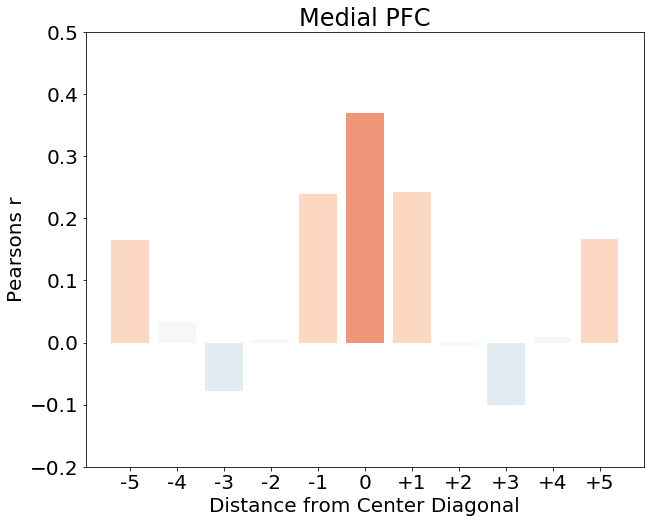

In [16]:
mpfc_df = pd.DataFrame({"x" : ['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5'],
                        "y" : [np.mean(mpfc_barplot['down5']), np.mean(mpfc_barplot['down4']), 
                               np.mean(mpfc_barplot['down3']), np.mean(mpfc_barplot['down2']), 
                               np.mean(mpfc_barplot['down1']), np.mean(mpfc_barplot['center']), 
                               np.mean(mpfc_barplot['up1']), np.mean(mpfc_barplot['up2']), 
                               np.mean(mpfc_barplot['up3']), np.mean(mpfc_barplot['up4']), 
                               np.mean(mpfc_barplot['up5'])]})
cmap = plt.get_cmap("RdBu_r")
fig, ax = plt.subplots(figsize = (10,8))
plt.bar(x="x", height="y", data=mpfc_df, color=cmap(norm(mpfc_df.y.values)))
plt.ylim(-0.2, 0.5)
plt.ylabel("Pearsons r")
plt.xlabel("Distance from Center Diagonal")
plt.title("Medial PFC")
#plt.savefig("/home/arenf001/seq_mPFC_barplot.png", dpi = 1080)
plt.show()

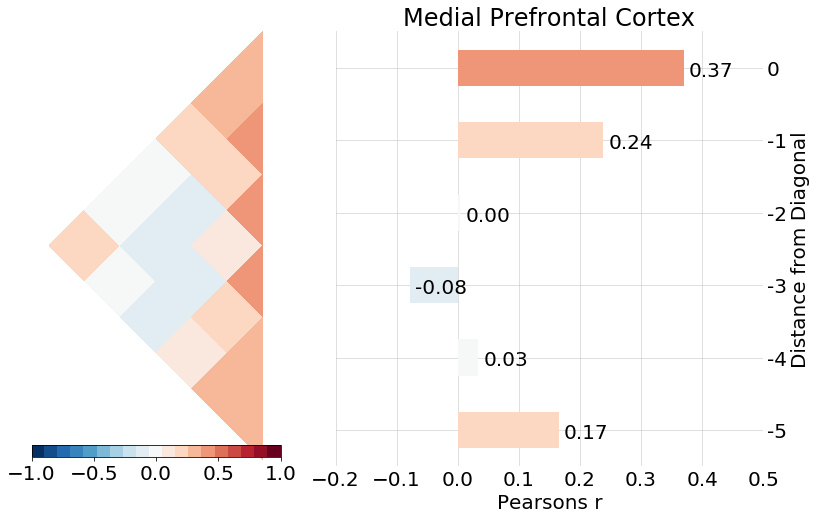

In [17]:
mpfc_list = [np.mean(mpfc_barplot['down5']), np.mean(mpfc_barplot['down4']), 
             np.mean(mpfc_barplot['down3']), np.mean(mpfc_barplot['down2']), 
             np.mean(mpfc_barplot['down1']), np.mean(mpfc_barplot['center'])]
labels = list(['-5','-4','-3','-2','-1', '0'])
series = pd.Series(mpfc_list, index=labels)
matrix = pd.DataFrame(mpfc_plot, columns=['A','B','C','D','E','F'], 
                                 index=['A','B','C','D','E','F'])
fontsize = 8 
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121, frame_on=False, aspect=2)    
cax,order = heatmap_triangle(matrix,ax)   
fig.subplots_adjust(wspace=-.08, hspace=0, left=-.05, right=.9)   
ax = fig.add_subplot(122, frame_on=False)     
ax.set_axisbelow(True)
cmap = pl.cm.RdBu_r 
norm = mp.colors.BoundaryNorm(np.linspace(-1, 1, 20), cmap.N)
ax = series.plot(ax=ax, kind='barh', linewidth=0, grid=False, color=cmap(norm(mpfc_df.y.values)))
ax.grid(b=True, which='major', axis='both', alpha=0.5)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), 
                xytext=(5, 10), textcoords='offset points')
ax.grid(b=True, which='major', axis='both', alpha=0.5)    
ax.set_xlim(-0.2,0.5)    
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')    
ax.tick_params(length=0, axis='x')
ax.tick_params(length=0, axis='y')
ax.set_xlabel('Pearsons r')
ax.set_ylabel('Distance from Diagonal')
ax.set_title("Medial Prefrontal Cortex")
#plt.savefig("/home/arenf001/mpfc_combined.png")
plt.show()